In [1]:
import tensorflow as tf

In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)
print('Tensorflow version ',tf.__version__)

Tensorflow version  1.14.0


In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
print('x_Train size',x_train.shape)
print('y_Train size',y_train.shape)
print('x_Test size',x_test.shape)
print('y_Test size',y_test.shape)
# 60000 test example and 10000 train examples, each input corresponds to an image of size 28*28 

x_Train size (60000, 28, 28)
y_Train size (60000,)
x_Test size (10000, 28, 28)
y_Test size (10000,)


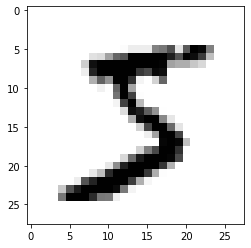

5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap='binary')
plt.show()
print(y_train[0])
print(set(y_train)) # see unique values in present in dataset
# just to see the image


In [8]:
from tensorflow.keras.utils import to_categorical
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)


In [10]:
y_test_encoded[0]
y_test[0]

7

In [26]:
import numpy as np
x_train_re=np.reshape(x_train,(60000,784))
x_test_re=np.reshape(x_test,(10000,784))
x_mean=np.mean(x_train_re)
x_std=np.mean(x_train_re)
epsilon=1e-10
x_train_norm=(x_train_re-x_mean)/(epsilon+x_std)
# using same mean and std to avoid unneccesary bias that can be caused due to anamoly in test set
x_test_norm=(x_test_re-x_mean)/(epsilon+x_std)

In [28]:
# appling NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [34]:
#compiling the model
#statistical gradient descent
model.compile(
optimizer='sgd', 
loss='categorical_crossentropy',
metrics=['accuracy']
)
model.summary()
#param equals input*shape+shape

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train_norm, y_train_encoded ,epochs=3)
#epochs=3 iterae thrice

Epoch 1/3
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2875 - acc: 0.9150
Epoch 2/3
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1333 - acc: 0.9601
Epoch 3/3
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0972 - acc: 0.9706


In [38]:
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('Accuracy for the 10k test examples are found to be',accuracy*100)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.1028 - acc: 0.9674
Accuracy for the 10k test examples are found to be 96.74000144004822


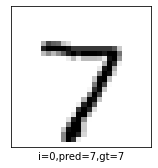

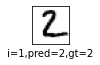

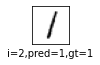

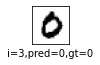

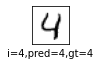

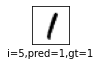

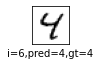

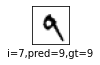

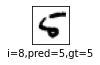

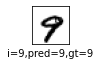

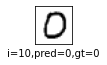

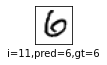

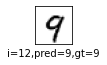

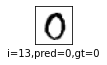

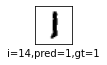

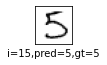

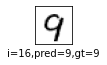

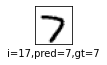

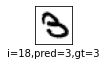

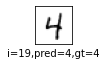

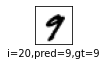

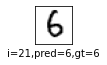

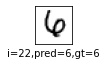

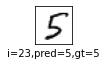

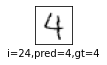

In [49]:
preds=model.predict(x_test_norm)

plt.figure(figsize=(15,15))
start_index=0
for i in range(25):
   plt.subplot(5,5,i+1)
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   pred=np.argmax(preds[start_index+i])
   gt=y_test[start_index+i]
   col='g'
   if pred!=gt :
     col='r'
   plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt))
   plt.imshow(x_test[start_index+i],cmap='binary')
   plt.show()


